# Competition analysis with geostatistic data
Author: **Jose Oswald Gonzalez Rangel**

#### This analysis has the objective to evaluate the diverse coffee shops in the area of Panorama park in the city of Leon, Guanajuato, Mexico by using the location of the coffee shops and other data extracted from Google API.

# Imports

In [184]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math

import warnings
warnings.filterwarnings("ignore")

from sklearn.cluster import DBSCAN
import plotly.express as px
import folium
from PIL import Image, ImageDraw
from scipy.stats import shapiro, levene, ttest_1samp, ttest_ind, mannwhitneyu

pd.set_option('display.max_columns', 100)

In [3]:
# Environment
import os
from dotenv import load_dotenv

# Load that .env file
load_dotenv()
google_key = os.getenv('key')

# Create the client for Google API 
import googlemaps
gmaps = googlemaps.Client(key=google_key)

# DataSet

For this analysis I will find the closest coffee shop in the street block of Panorama park.\
To get the data I defined 4 points in the map with a distance between each other of 500 to 1k meters.

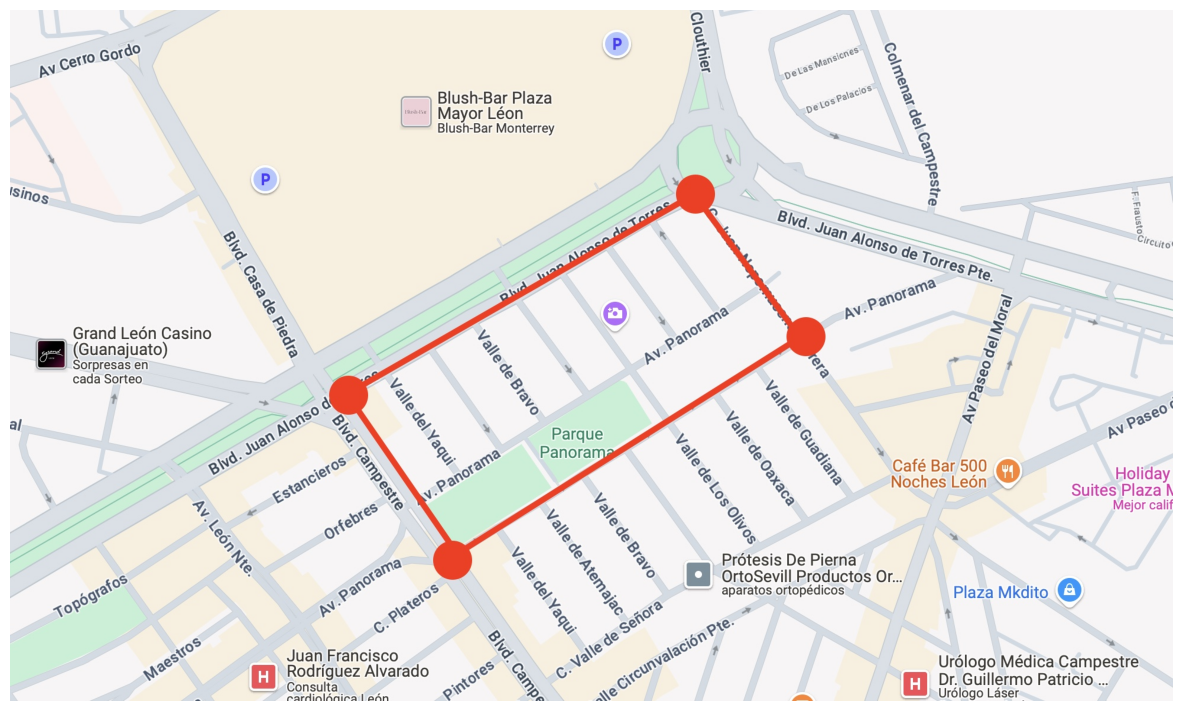

In [80]:
# Search the coordinates on google maps of the attention zone
img = mpimg.imread('panoram.jpg')
plt.figure(figsize=(15, 10))
plt.imshow(img)
plt.axis('off') 
plt.show()

Then I extract the coordinates in decimal degrees manually from google maps.

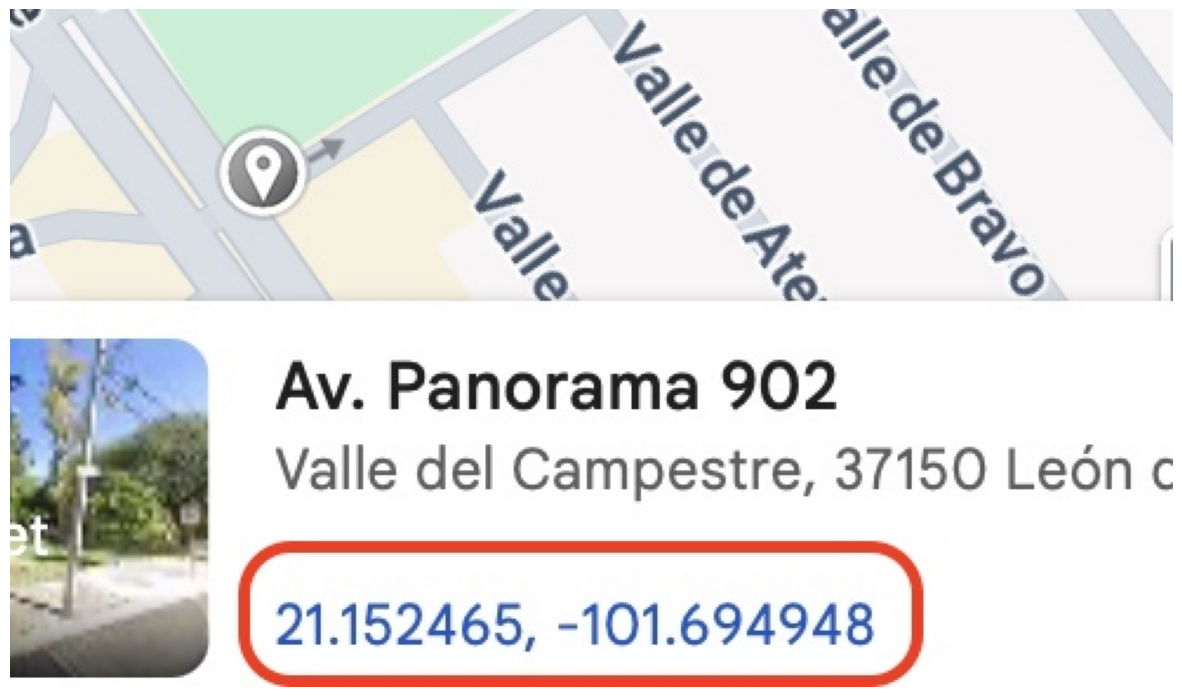

In [82]:
# Search the coordinates on google maps of the attention zone
img = mpimg.imread('panoram_latlon.jpg')
plt.figure(figsize=(15, 10))
plt.imshow(img)
plt.axis('off') 
plt.show()

In [88]:
# Coordinates in Decimal Degrees
y_latitud_1,x_longitud_1 = 21.154231, -101.696581
y_latitud_2,x_longitud_2 = 21.150903, -101.693868
y_latitud_3,x_longitud_3 = 21.153346, -101.689427
y_latitud_4,x_longitud_4 = 21.156595, -101.691910

y_latitudes  = [y_latitud_1,y_latitud_2,y_latitud_3,y_latitud_4]
x_longitudes = [x_longitud_1,x_longitud_2,x_longitud_3,x_longitud_4]

In [91]:
# Define the map
map_leon= folium.Map(location=[y_latitud_1,x_longitud_1])
map_leon

# Extraction from Google API

By getting the coordinates of the area I want to look I can use the Google API to find the closest coffee shops.\
I set the radius of search as 500 meters for each point.

In [129]:
# Places API
radius = 500
results = []

# Loop for each point
for y_lat,x_lon in zip(y_latitudes,x_longitudes):
    places_result = gmaps.places_nearby(location=(y_lat,x_lon),
                                        radius=radius,
                                        keyword="cafe")
        
    for place in places_result['results']:
        results.append({
                            'name': place['name'],
                            'address': place.get('vicinity', 'No address'),
                            'state':place.get('plus_code', {}).get('compound_code', 'Sin estado'),
                            'latitude': place['geometry']['location']['lat'],
                            'longitude': place['geometry']['location']['lng'],
                            'rating': place.get('rating',None),
                            'rating_users': place.get('user_ratings_total', None)
                        })

In [170]:
# Show results
coffe_shops = pd.DataFrame(results)
coffe_shops = coffe_shops.drop_duplicates(ignore_index=True)
coffe_shops.to_csv('coffe_shopsPanorama.csv')
coffe_shops

,name,address,state,latitude,longitude,rating,rating_users
0,Café & Cocina,"Blvd. Campestre 807-Local 4, Jardines del Mora...","48X5+R5 Leon, Guanajuato",21.149591,-101.692113,4.8,505
1,Cielito querido café,"Valle del Campestre, Leon","5843+89 Leon, Guanajuato",21.155814,-101.696597,5.0,3
2,Bôulan,"Av. León 409, Jardines del Moral, León de los ...","48X4+47 Leon, Guanajuato",21.147867,-101.694276,4.6,3482
3,CAFÉ DEL VALLE,"Av. Panorama 1109, Valle del Campestre, León d...","5834+F5 Leon, Guanajuato",21.153686,-101.694541,4.4,221
4,The Nogal Coffee House,"Calle Circunvalación Pte. 848, Jardines del Mo...","5824+7P Leon, Guanajuato",21.150746,-101.693169,4.3,58
5,Atl Café,"Av. Panorama 907, Valle del Campestre, León de...","5823+Q8 Leon, Guanajuato",21.151920,-101.696633,4.8,56
6,StarLight Café - Plaza Mayor®,Blvd. Juan Alonso de Torres Pte. 2002-Local 20...,"5853+2Q Leon, Guanajuato",21.157583,-101.695510,4.5,1250
7,CATA CAFÉ LEÓN,"Valle del Mezquital 222, Valle del Campestre, ...","5844+3F Leon, Guanajuato",21.155185,-101.693865,4.7,13
8,LA COFFEETERIA BISTRO,"C. Juan Nepomuceno Herrera 313, Valle del Camp...","5845+C8 Leon, Guanajuato",21.156108,-101.691713,4.7,500
9,Chantty Café,"Av. Panorama 1405, Valle del Campestre, 340","5834+RR Leon, Guanajuato",21.154615,-101.692966,4.2,425


In [171]:
coffe_shops.shape

(29, 7)

I find 29 coffee shops in the area

# **GeoGraph**

In [172]:
# Graph the coffees in the map
for x in range(0,len(coffe_shops)): 
       folium.CircleMarker(
          location=(coffe_shops.iloc[x]['latitude'], coffe_shops.iloc[x]['longitude']),
          popup= 'Coffee:(' + str( coffe_shops.iloc[x]['name']) + ')',
          fill_opacity=1,
          color = 'red',
          fill_color= 'red'
       ).add_to(map_leon)
map_leon

In [234]:
# Best rated coffees
coffe_shops[coffe_shops['rating_users']>=50].sort_values('rating',ascending=False)\
    [['name','rating_users','rating']].head(3)

,name,rating_users,rating
0,Café & Cocina,505,4.8
5,Atl Café,56,4.8
21,AROMA & SABOR,95,4.8


The top 3 coffee shops has a 4.8 rating degree

In [175]:
# Most rated coffees
coffe_shops.sort_values('rating_users',ascending=False)\
    [['name','rating_users','rating']].head(3)

,name,rating_users,rating
22,Krispy Kreme,4615,4.5
16,Coffee Bar 500 Noches León,3621,4.6
2,Bôulan,3482,4.6


the most rated coffee shops has more than 3.4k users that set the rating between 4.5 and 4.6 stars.

## *Distance between points*
For this exercise I use the coordinates of the coffee shops to make clusters and the optimal positions.

### **Euclidean Coordinates**

#### By using the Mercator projection is easier to work with Cartesian coordinates in a 2D plane.

**Fórmula de Mercator**

A point given by geographic coordinates:
- **Latitude** $ \phi $ in degrees
- **Longitude** $ \lambda $ in degrees

Convertion to **Mercator Plane**:

$x = R \cdot \lambda_{\text{rad}}$

$y = R \cdot \ln\left( \tan\left( \frac{\pi}{4} + \frac{\phi_{\text{rad}}}{2} \right) \right)$

**Where:**
- $ R $ = Earth Radius in meters (**6,378,137m** in Mercator Web).
- $ \lambda_{\text{rad}} = \lambda \times \frac{\pi}{180} $ → **Longitude in radians**.
- $ \phi_{\text{rad}} = \phi \times \frac{\pi}{180} $ → **Latitude in radians**.
- $ \ln() $ → **Natural logarithm**.


In [221]:
# Defining convertion function 
R = 6_378_137
def DDtoMercator(lat,lon):
    x = R * np.radians(lon) # Longitude to meters
    y = R * np.log(np.tan(np.pi / 4 + np.radians(lat) / 2)) # Latitud to meters
    return np.float64(x), np.float64(y)

# Defining reverse convertion function
def MercatortoDD(x,y):
    lon = np.degrees(x/R) # Longitude to degrees
    lat = np.degrees(np.arctan(np.sinh(y/R))) # Latitude to degrees
    return np.float64(lat), np.float64(lon)

In [190]:
# Applying the Mercator convertion function
coffe_shops[['latitude_merc', 'longitude_merc']] = coffe_shops.apply(lambda row: DDtoMercator(row['latitude'], row['longitude']), 
                                                                     axis=1, result_type='expand')

To find the clusters I used DBSCAN algorithm

### **DBSCAN**

In [279]:
## Parameters
pts_min = 2
radio = 200 # meters

df_dbscan = coffe_shops
# pts_min = min(df_dbscan.shape[0], pts_min_neg)
dbscan_opt = DBSCAN(eps=radio, min_samples=pts_min)
dbscan_opt.fit(df_dbscan[['latitude_merc',	'longitude_merc']])
dbscan_opt.labels_

array([ 0, -1,  0,  0,  0,  1,  2,  0,  3,  0,  3,  1,  0,  0,  0,  4,  4,
        0, -1, -1,  4,  4, -1,  4, -1,  4,  4,  0,  2])

In [280]:
#  the cluster label
coffe_shops['clusters'] = dbscan_opt.labels_
coffe_shops['no_cluster_color'] = coffe_shops['clusters'].apply(lambda x: 'red' if x == -1 else 'blue')
coffe_shops.head(5)

,name,address,state,latitude,longitude,rating,rating_users,latitude_merc,longitude_merc,clusters,no_cluster_color
0,Café & Cocina,"Blvd. Campestre 807-Local 4, Jardines del Mora...","48X5+R5 Leon, Guanajuato",21.149591,-101.692113,4.8,505,-1.132031e+07,2.409725e+06,0,blue
1,Cielito querido café,"Valle del Campestre, Leon","5843+89 Leon, Guanajuato",21.155814,-101.696597,5.0,3,-1.132081e+07,2.410468e+06,-1,red
2,Bôulan,"Av. León 409, Jardines del Moral, León de los ...","48X4+47 Leon, Guanajuato",21.147867,-101.694276,4.6,3482,-1.132056e+07,2.409519e+06,0,blue
3,CAFÉ DEL VALLE,"Av. Panorama 1109, Valle del Campestre, León d...","5834+F5 Leon, Guanajuato",21.153686,-101.694541,4.4,221,-1.132058e+07,2.410214e+06,0,blue
4,The Nogal Coffee House,"Calle Circunvalación Pte. 848, Jardines del Mo...","5824+7P Leon, Guanajuato",21.150746,-101.693169,4.3,58,-1.132043e+07,2.409863e+06,0,blue


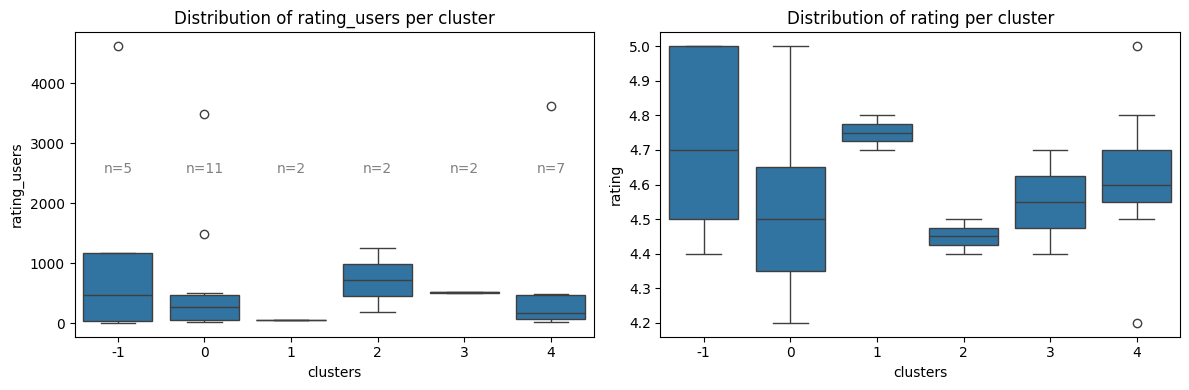

In [325]:
# Rating per cluster
plt.figure(figsize=(12,4))
for sub,i in enumerate(['rating_users','rating']):
    plt.subplot(1,2,sub+1)
    plt.title('Distribution of {} per cluster'.format(i))
    
    sns.boxplot(y=coffe_shops[i],x=coffe_shops['clusters'])
    # sns.scatterplot(y=coffe_shops[i],x=coffe_shops['clusters']+1,alpha=.4)
    
    a = (coffe_shops['clusters']+1).value_counts(sort=False)
    for x,j in enumerate(a.index.sort_values()):
        plt.annotate('n={}'.format(a.loc[j]),(x,2500),horizontalalignment='center',color='grey')
        
plt.tight_layout()
plt.show()

- The clusters 1,2 and 3 has only 2 coffee shops
- The coffe shops without cluster have better rating

In [282]:
# Create the graph
mapa_clusters= folium.Map(location=[coffe_shops.iloc[0]['latitude'], coffe_shops.iloc[0]['longitude']],
                      popup= 'Coffee:(' + str( coffe_shops.iloc[x]['name']) + ')',
                      fill_opacity=.70,
                      #fill_color = 'gray'    
                      )

# Graph the coffees in the map
for x in range(0,len(coffe_shops)): 
       folium.CircleMarker(
          location=(coffe_shops.iloc[x]['latitude'], coffe_shops.iloc[x]['longitude']),
          popup= 'Coffee:(' + str( coffe_shops.iloc[x]['name']) + ') Cluster: ' + str(coffe_shops.iloc[x]['clusters']),
          fill_opacity=.70,
          color = coffe_shops.iloc[x]['no_cluster_color'],
          fill_color= coffe_shops.iloc[x]['no_cluster_color']
       ).add_to(mapa_clusters)
mapa_clusters

The coffee shops without a cluster are ones on the edge of the area

In [283]:
# Average distance between points
coffe_agrup = coffe_shops.groupby('clusters')[['latitude_merc','longitude_merc']].mean().reset_index()

# Transform to degrees
coffe_agrup[['latitude', 'longitude']] = coffe_agrup.apply(
    lambda row: MercatortoDD(row['latitude_merc'], row['longitude_merc']), axis=1, result_type='expand'
)
# Graphing each mean point for each cluster
for x in range(0,len(coffe_agrup)): ## gcoor_x	gcoor_y
       folium.CircleMarker(
          location=(coffe_agrup.iloc[x]['latitude'], coffe_agrup.iloc[x]['longitude']),
          popup= 'Average Point Cluster: ' + str(coffe_agrup.iloc[x]['clusters']),
          fill_opacity=.70,
          color = 'grey',
          fill_color= 'pink'
       ).add_to(mapa_clusters)
       
mapa_clusters

The central points of the clusters are located mostly at the center and south of the Panorama park